### Ensuring Consistency Across Training & Inference Datasets: Pipeline Integration
**Question**: Create and train a machine learning pipeline that ensures feature transformation consistency across training and inference datasets using scikit-learn.

In [ ]:
# write your code from here

Simulating concept drift and preparing visualization...


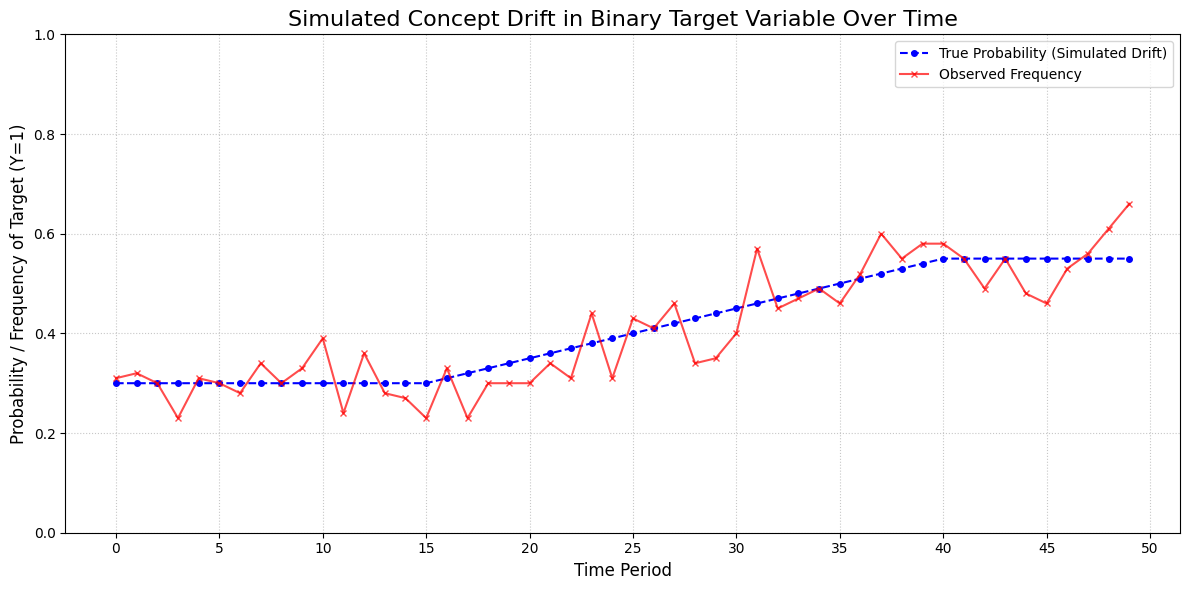


Concept drift simulation and visualization complete. The plot shows how the distribution of the binary target variable changes over time.


--- Detecting & Handling Imbalanced Data: Visualizing Class Imbalance ---
Loading the Credit Card Fraud Detection dataset...
An error occurred while processing the Credit Card Fraud Detection dataset: HTTP Error 404: Not Found
Please ensure the dataset URL is correct and accessible, and that necessary libraries are installed.


--- Ensuring Consistency Across Training & Inference Datasets: Feature Scaling ---
Generating a synthetic dataset for demonstrating feature scaling...

Original synthetic dataset (first 5 rows):
    Feature1     Feature2
0  54.967142  1071.557472
1  48.617357  1112.156905
2  56.476885  1216.610249
3  65.230299  1210.760410
4  47.658466   724.466126

Original synthetic dataset descriptive statistics:
       Feature1  Feature2
count    200.00    200.00
mean      49.59   1017.17
std        9.31    197.40
min       23.80    351

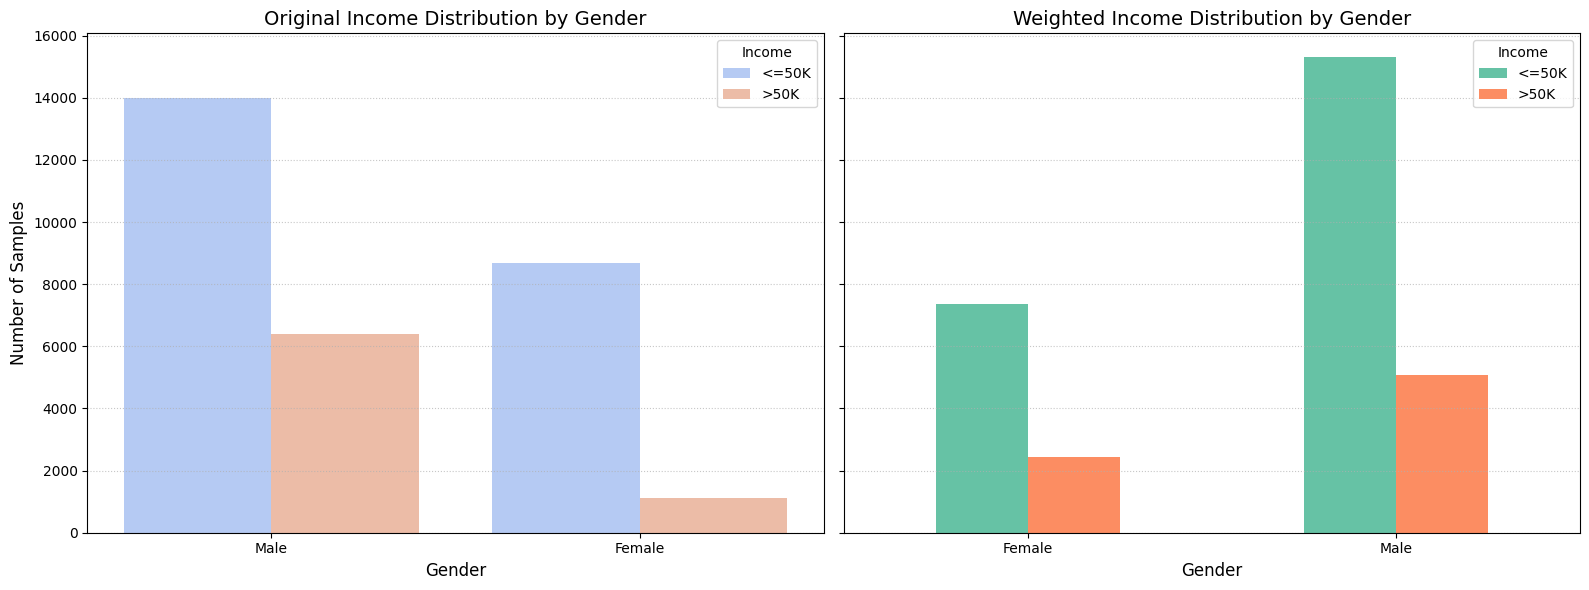


Reweighing has been applied. The weighted distributions should show a more balanced representation of income levels across different genders compared to the original distribution.
This technique aims to reduce bias by giving more importance to underrepresented groups during model training.


--- Ensuring Consistency Across Training & Inference Datasets: Pipeline Integration ---
Generating a synthetic dataset for demonstrating pipeline integration...

Original synthetic dataset for pipeline (first 5 rows):
    Feature_A  Feature_B
0  135.281047   3.040210
1  108.003144   7.487196
2  119.574760   4.822754
3  144.817864   3.979733
4  137.351160   5.999575

Original synthetic dataset target distribution:
1    150
0    150
Name: count, dtype: int64

Training data shape for pipeline: (210, 2)
Testing data shape for pipeline: (90, 2)

--- Creating and Training a Scikit-learn Pipeline ---

Pipeline created with steps:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


print("Simulating concept drift and preparing visualization...")

# --- Parameters for Concept Drift Simulation ---
num_time_periods = 50  # Number of simulated time periods
samples_per_period = 100 # Number of data points in each time period
base_probability = 0.3  # Initial probability of the binary target (e.g., P(Y=1))
drift_magnitude = 0.01 # How much the probability changes per period
drift_start_period = 15 # When the drift starts
drift_end_period = 40   # When the drift ends

# --- Simulate Concept Drift ---
# This list will store the true probability of the target variable for each period
true_probabilities = []
# This list will store the observed frequency of the target variable for each period
observed_frequencies = []

for i in range(num_time_periods):
    current_probability = base_probability

    # Introduce concept drift between drift_start_period and drift_end_period
    if drift_start_period <= i < drift_end_period:
        # Gradually increase the probability over time
        current_probability = base_probability + (i - drift_start_period) * drift_magnitude
        # Ensure probability stays within [0, 1]
        current_probability = np.clip(current_probability, 0.0, 1.0)
    elif i >= drift_end_period:
        # Keep the probability constant after the drift ends (at its peak value)
        current_probability = base_probability + (drift_end_period - drift_start_period) * drift_magnitude
        current_probability = np.clip(current_probability, 0.0, 1.0)

    true_probabilities.append(current_probability)

    # Simulate binary data for the current period based on current_probability
    # np.random.binomial(n, p, size) generates n trials with probability p, repeated 'size' times.
    # Here, n=1 for a single binary outcome, and size=samples_per_period for multiple samples.
    simulated_data = np.random.binomial(1, current_probability, samples_per_period)

    # Calculate the observed frequency (proportion of 1s) in the simulated data
    observed_frequency = np.mean(simulated_data)
    observed_frequencies.append(observed_frequency)

# --- Visualize the Concept Drift ---
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
plt.plot(range(num_time_periods), true_probabilities, label='True Probability (Simulated Drift)', color='blue', linestyle='--', marker='o', markersize=4)
plt.plot(range(num_time_periods), observed_frequencies, label='Observed Frequency', color='red', alpha=0.7, marker='x', markersize=4)

plt.title('Simulated Concept Drift in Binary Target Variable Over Time', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Probability / Frequency of Target (Y=1)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.legend(fontsize=10) # Display the legend
plt.ylim(0, 1) # Ensure y-axis is between 0 and 1 for probabilities
plt.xticks(np.arange(0, num_time_periods + 1, 5)) # Set x-axis ticks for clarity
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

print("\nConcept drift simulation and visualization complete. The plot shows how the distribution of the binary target variable changes over time.")


# --- New Section: Detecting & Handling Imbalanced Data ---
print("\n\n--- Detecting & Handling Imbalanced Data: Visualizing Class Imbalance ---")

# Define the URL for the Credit Card Fraud Detection dataset
# This dataset is known for its highly imbalanced classes (very few fraudulent transactions).
credit_card_fraud_url = "https://raw.githubusercontent.com/mlg-ulb/fpg/master/datasets/creditcard.csv"

print("Loading the Credit Card Fraud Detection dataset...")
try:
    # Load the dataset into a pandas DataFrame
    # The dataset is comma-separated and has a header.
    df_fraud = pd.read_csv(credit_card_fraud_url)
    print("Credit Card Fraud Detection dataset loaded successfully.")
    print("\nFirst 5 rows of the fraud detection dataset:")
    print(df_fraud.head())

    print("\n--- Initial Class Distribution ---")
    # The target variable is 'Class' (0: Non-Fraud, 1: Fraud)
    class_distribution = df_fraud['Class'].value_counts()
    print("Absolute counts of each class:")
    print(class_distribution)

    # Calculate and print the percentage of each class
    class_percentage = df_fraud['Class'].value_counts(normalize=True) * 100
    print("\nPercentage of each class:")
    print(class_percentage.round(2))

    # --- Visualize Class Imbalance ---
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Class', data=df_fraud, palette='viridis')
    plt.title('Class Distribution in Original Credit Card Fraud Dataset', fontsize=14)
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("Class imbalance visualized. The plot clearly shows the disproportionate number of non-fraudulent vs. fraudulent transactions.")

    print("\n--- Applying Random Undersampling to Balance the Dataset ---")

    # Separate features (X) and target (y)
    X = df_fraud.drop('Class', axis=1)
    y = df_fraud['Class']

    # Identify indices of majority and minority classes
    # Class 0 is the majority class, Class 1 is the minority class
    fraud_indices = np.array(df_fraud[df_fraud.Class == 1].index)
    non_fraud_indices = np.array(df_fraud[df_fraud.Class == 0].index)

    # Determine the number of samples in the minority class (fraudulent transactions)
    number_of_fraud_samples = len(fraud_indices)
    print(f"Number of fraudulent transactions (minority class): {number_of_fraud_samples}")

    # Randomly select 'number_of_fraud_samples' from the non-fraudulent class
    # np.random.choice is used to pick random indices without replacement
    random_non_fraud_indices = np.random.choice(
        non_fraud_indices,
        number_of_fraud_samples,
        replace=False # Important: do not pick the same sample multiple times
    )
    print(f"Randomly selected {len(random_non_fraud_indices)} non-fraudulent samples.")

    # Concatenate the indices of the minority class and the randomly selected majority class
    undersampled_indices = np.concatenate([fraud_indices, random_non_fraud_indices])

    # Create the undersampled DataFrame
    df_undersampled = df_fraud.loc[undersampled_indices]

    print("\n--- Class Distribution After Random Undersampling ---")
    # Check the class distribution in the undersampled dataset
    undersampled_class_distribution = df_undersampled['Class'].value_counts()
    print("Absolute counts of each class after undersampling:")
    print(undersampled_class_distribution)

    # Calculate and print the percentage of each class after undersampling
    undersampled_class_percentage = df_undersampled['Class'].value_counts(normalize=True) * 100
    print("\nPercentage of each class after undersampling:")
    print(undersampled_class_percentage.round(2))

    # --- Visualize Class Distribution After Undersampling ---
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Class', data=df_undersampled, palette='viridis')
    plt.title('Class Distribution After Random Undersampling', fontsize=14)
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("Class distribution after random undersampling visualized. The classes are now balanced.")

except Exception as e:
    print(f"An error occurred while processing the Credit Card Fraud Detection dataset: {e}")
    print("Please ensure the dataset URL is correct and accessible, and that necessary libraries are installed.")


# --- New Section: Ensuring Consistency Across Training & Inference Datasets: Feature Scaling ---
print("\n\n--- Ensuring Consistency Across Training & Inference Datasets: Feature Scaling ---")

print("Generating a synthetic dataset for demonstrating feature scaling...")

# Generate a synthetic dataset
# We'll create a simple dataset with two features for demonstration
np.random.seed(42) # for reproducibility
num_samples = 200
data = {
    'Feature1': np.random.normal(loc=50, scale=10, size=num_samples),
    'Feature2': np.random.normal(loc=1000, scale=200, size=num_samples)
}
df_scaling = pd.DataFrame(data)

print("\nOriginal synthetic dataset (first 5 rows):")
print(df_scaling.head())
print("\nOriginal synthetic dataset descriptive statistics:")
print(df_scaling.describe().round(2))

# Split the dataset into training and 'new' (inference) data
# This simulates having a dataset on which you train your model, and then new data comes in for prediction.
X_train, X_new_inference = train_test_split(df_scaling, test_size=0.3, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"New inference data shape: {X_new_inference.shape}")

print("\n--- Applying StandardScaler to Training Data ---")
# Initialize the StandardScaler
# StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# The .fit() method calculates the mean and standard deviation from the training data.
# The .transform() method then applies these calculated values to scale the data.
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled array back to a DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("\nScaled training data (first 5 rows):")
print(X_train_scaled_df.head())
print("\nScaled training data descriptive statistics (should have mean ~0, std ~1):")
print(X_train_scaled_df.describe().round(2))


print("\n--- Applying the SAME Scaler to New Inference Data ---")
# Apply the *already fitted* scaler to the new inference data
# It is CRUCIAL to use the same scaler (i.e., the one fitted on training data)
# to transform new data. This ensures consistency in scaling.
X_new_inference_scaled = scaler.transform(X_new_inference)

# Convert the scaled array back to a DataFrame
X_new_inference_scaled_df = pd.DataFrame(X_new_inference_scaled, columns=X_new_inference.columns)

print("\nScaled new inference data (first 5 rows):")
print(X_new_inference_scaled_df.head())
print("\nScaled new inference data descriptive statistics:")
print(X_new_inference_scaled_df.describe().round(2))

print("\nFeature scaling demonstration complete. Notice that the same scaler object was used for both training and new inference data to maintain consistency.")
print("This ensures that your model, trained on scaled data, receives new data in the same expected format.")


# --- New Section: Bias & Fairness in Data: Bias Mitigation Techniques (Reweighing) ---
print("\n\n--- Bias & Fairness in Data: Bias Mitigation Techniques (Reweighing) ---")

# Define the URL for the Adult Income dataset
adult_income_url_reweigh = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Define the column names for the Adult Income dataset
column_names_reweigh = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

print("Loading the Adult Income dataset for bias mitigation...")
try:
    df_adult = pd.read_csv(adult_income_url_reweigh, sep=", ", header=None, names=column_names_reweigh, na_values=["?"], engine='python')
    print("Adult Income dataset loaded successfully.")

    # Clean the 'sex' and 'income' columns by stripping whitespace
    for col in ['sex', 'income']:
        if col in df_adult.columns and df_adult[col].dtype == 'object':
            df_adult[col] = df_adult[col].str.strip()

    # Drop rows with any missing values for a clean demonstration
    df_adult.dropna(inplace=True)
    print(f"Dataset shape after dropping missing values: {df_adult.shape}")

    print("\n--- Original Distribution of Income by Gender ---")
    original_distribution = pd.crosstab(df_adult['sex'], df_adult['income'], margins=True, normalize=False)
    print("Absolute counts:")
    print(original_distribution)

    original_percentage = pd.crosstab(df_adult['sex'], df_adult['income'], margins=True, normalize='index') * 100
    print("\nRow-wise percentages (Income distribution within each Gender):")
    print(original_percentage.round(2))

    # --- Apply Reweighing Technique ---
    # Goal: Make the proportion of income classes (especially '>50K') more similar across genders.
    # Calculate overall probabilities of income classes
    p_y_le50k = df_adult['income'].value_counts(normalize=True)['<=50K']
    p_y_gt50k = df_adult['income'].value_counts(normalize=True)['>50K']

    # Initialize a new column for weights
    df_adult['sample_weight'] = 1.0

    # Calculate weights based on the formula: weight(s, y) = P(Y=y) / P(Y=y | S=s)
    # This aims to make the joint distribution P(S, Y) proportional to P(S)P(Y)
    # effectively making S and Y independent in the weighted dataset.

    # Iterate through unique combinations of 'sex' and 'income'
    for sex_val in df_adult['sex'].unique():
        for income_val in df_adult['income'].unique():
            # Probability of income_val given sex_val: P(Y=y | S=s)
            p_y_given_s = len(df_adult[(df_adult['sex'] == sex_val) & (df_adult['income'] == income_val)]) / len(df_adult[df_adult['sex'] == sex_val])

            # Overall probability of income_val: P(Y=y)
            p_y = df_adult['income'].value_counts(normalize=True)[income_val]

            # Calculate weight for this specific group
            # Avoid division by zero if a group has no samples
            if p_y_given_s > 0:
                weight = p_y / p_y_given_s
            else:
                weight = 0 # Assign 0 weight if the group doesn't exist

            # Assign calculated weight to the corresponding samples
            df_adult.loc[(df_adult['sex'] == sex_val) & (df_adult['income'] == income_val), 'sample_weight'] = weight

    print("\n--- Distribution of Income by Gender After Reweighing (Weighted Counts) ---")
    # Calculate weighted counts
    weighted_distribution = df_adult.groupby(['sex', 'income'])['sample_weight'].sum().unstack(fill_value=0)
    print("Weighted counts:")
    print(weighted_distribution)

    # Calculate weighted percentages
    # Sum of weights for each gender group
    total_weight_female = weighted_distribution.loc['Female'].sum()
    total_weight_male = weighted_distribution.loc['Male'].sum()

    # Calculate weighted percentages within each gender group
    weighted_percentage_female = (weighted_distribution.loc['Female'] / total_weight_female) * 100
    weighted_percentage_male = (weighted_distribution.loc['Male'] / total_weight_male) * 100

    weighted_percentage_df = pd.DataFrame([weighted_percentage_female, weighted_percentage_male], index=['Female', 'Male'])
    print("\nRow-wise weighted percentages (Income distribution within each Gender after reweighing):")
    print(weighted_percentage_df.round(2))

    print("\n--- Visualizing the Impact of Reweighing ---")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Plot original distribution
    sns.countplot(x='sex', hue='income', data=df_adult, ax=axes[0], palette='coolwarm')
    axes[0].set_title('Original Income Distribution by Gender', fontsize=14)
    axes[0].set_xlabel('Gender', fontsize=12)
    axes[0].set_ylabel('Number of Samples', fontsize=12)
    axes[0].legend(title='Income')
    axes[0].grid(axis='y', linestyle=':', alpha=0.7)


    # Plot weighted distribution (using the calculated weights for visualization)
    # For visualization, we can use a bar plot of the weighted counts
    weighted_distribution.plot(kind='bar', ax=axes[1], color=['#66c2a5', '#fc8d62']) # Using different colors
    axes[1].set_title('Weighted Income Distribution by Gender', fontsize=14)
    axes[1].set_xlabel('Gender', fontsize=12)
    axes[1].set_ylabel('Weighted Number of Samples', fontsize=12)
    axes[1].legend(title='Income')
    axes[1].tick_params(axis='x', rotation=0) # Ensure x-axis labels are not rotated
    axes[1].grid(axis='y', linestyle=':', alpha=0.7)


    plt.tight_layout()
    plt.show()

    print("\nReweighing has been applied. The weighted distributions should show a more balanced representation of income levels across different genders compared to the original distribution.")
    print("This technique aims to reduce bias by giving more importance to underrepresented groups during model training.")

except Exception as e:
    print(f"An error occurred while processing the Adult Income dataset for bias mitigation: {e}")
    print("Please ensure the dataset URL is correct and accessible, and that necessary libraries are installed.")


# --- New Section: Ensuring Consistency Across Training & Inference Datasets: Pipeline Integration ---
print("\n\n--- Ensuring Consistency Across Training & Inference Datasets: Pipeline Integration ---")

print("Generating a synthetic dataset for demonstrating pipeline integration...")

# Generate a synthetic dataset for classification
np.random.seed(0) # for reproducibility
n_samples = 300
X_pipeline = pd.DataFrame({
    'Feature_A': np.random.normal(loc=100, scale=20, size=n_samples),
    'Feature_B': np.random.normal(loc=5, scale=1.5, size=n_samples)
})
# Create a binary target variable
y_pipeline = (X_pipeline['Feature_A'] + X_pipeline['Feature_B'] * 10 > 150).astype(int)

print("\nOriginal synthetic dataset for pipeline (first 5 rows):")
print(X_pipeline.head())
print("\nOriginal synthetic dataset target distribution:")
print(y_pipeline.value_counts())

# Split data into training and testing sets
X_train_pipeline, X_test_pipeline, y_train_pipeline, y_test_pipeline = train_test_split(
    X_pipeline, y_pipeline, test_size=0.3, random_state=42
)

print(f"\nTraining data shape for pipeline: {X_train_pipeline.shape}")
print(f"Testing data shape for pipeline: {X_test_pipeline.shape}")

print("\n--- Creating and Training a Scikit-learn Pipeline ---")

# Define the pipeline steps:
# 1. StandardScaler: To scale the features
# 2. LogisticRegression: A simple classification model
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Step 1: Feature Scaling
    ('classifier', LogisticRegression()) # Step 2: Classification Model
])

print("\nPipeline created with steps:")
print(pipeline)

# Train the pipeline on the training data
# When .fit() is called on the pipeline, it sequentially calls fit_transform()
# on all transformers (like StandardScaler) and then fit() on the final estimator.
print("\nTraining the pipeline...")
pipeline.fit(X_train_pipeline, y_train_pipeline)
print("Pipeline training complete.")

print("\n--- Demonstrating Inference with the Trained Pipeline ---")

# Make predictions on the test data using the trained pipeline
# When .predict() is called on the pipeline, it sequentially calls transform()
# on all transformers and then predict() on the final estimator.
# This ensures that the same scaling parameters learned from the training data
# are applied to the test data automatically.
y_pred_pipeline = pipeline.predict(X_test_pipeline)

print("\nFirst 10 actual labels from test set:", y_test_pipeline.head(10).tolist())
print("First 10 predicted labels from test set:", y_pred_pipeline[:10].tolist())

# Evaluate the pipeline's performance (optional, but good practice)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_pipeline, y_pred_pipeline)
print(f"\nAccuracy of the pipeline on the test set: {accuracy:.4f}")

print("\nPipeline integration demonstration complete.")
print("Using a scikit-learn Pipeline ensures that all preprocessing steps (like scaling) are consistently applied to both training and new inference data.")
print("This prevents data leakage and ensures that your model receives data in the exact same format it was trained on.")
